In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


In [0]:
img_list = os.listdir("./Untitled Folder") 
img_list.sort()

In [4]:
def data_augmentation(img):
  width = img.shape[1];
  height = img.shape[0]
  for i in range(height):
    for j in range(width):
      img[i][5]=254-img[i][4]
  gamma=0.5
  img=np.power(img, gamma)
  img=(img/np.max( img) *255).astype(np.uint8)
  img=cv2.GaussianBlur(img, (3,3), 0)
  src=np.float32([[0, 0],[0, height],[width, height], [width,0]])
  dst=np.float32([[0, height],[0, 0],[width, 0], [width, height]])
  Mper=cv2.getPerspectiveTransform(src,dst)
  img=cv2.warpPerspective(img,Mper, (width, height) )
  M=np.float32([[1,0,-width*1/4],[0,1,height*1/5]])
  img=cv2.warpAffine(img,M, (width, height), borderValue=255)
  m180=cv2.getRotationMatrix2D((width/2, height/2), 180, 1)
  img=cv2.warpAffine(img,m180, (width, height))
  skew=np.float32([[1,1,1],[0,1,1]])
  img=cv2.warpAffine(img, skew, (width, height))
  return img


#fun save
for i in img_list:
 img_path=os.path.join(r"./Untitled Folder", i)
 img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
 aug_path=os.path. join(r"./Untitled Folder", "aug"+i)
 cv2.imwrite(aug_path, data_augmentation(img))
 print(aug_path +" saved!")

./Untitled Folder/augimage_0001.jpg saved!
./Untitled Folder/augimage_0004.jpg saved!
./Untitled Folder/augimage_0005.jpg saved!
./Untitled Folder/augimage_0006.jpg saved!
./Untitled Folder/augimage_0007.jpg saved!
./Untitled Folder/augimage_0008.jpg saved!
./Untitled Folder/augimage_0009.jpg saved!
./Untitled Folder/augimage_0010.jpg saved!


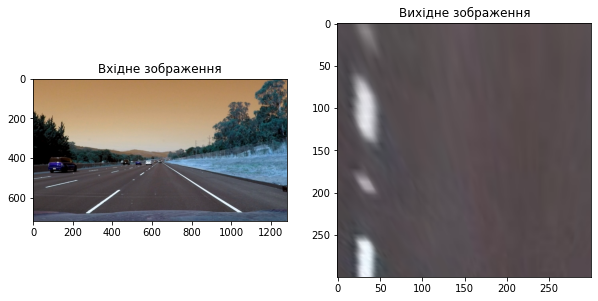

In [6]:
img = cv2.imread("./test_img.jpg")
OUT_IMG_WIDTH = 500
OUT_IMG_HEIGHT = 500

#scope
src = np.float32([[590, 450],[695, 450],[1060, 662],[252,662]])
dst = np.float32([[10, 10],[490, 10],[490, 490],[10, 490]])
M = cv2.getPerspectiveTransform(src, dst)
wraped_img = cv2.warpPerspective(img, M, (300,300))

#plot
plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(img); plt.title('Вхідне зображення');
plt.subplot(122); plt.imshow(wraped_img); plt.title('Вихідне зображення');
plt.show()